# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tkinter as tk
from tkinter import ttk
sns.set()

In [2]:
raw_data = pd.read_csv('./UserCarData.csv')

In [3]:
raw_data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


# Data exploration and cleaning

In [4]:
raw_data.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

In [5]:
raw_data.shape

(7906, 18)

In [6]:
raw_data.describe(include = 'all').round(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
count,7906.00,7906,7906.00,7906.00,7906.00,7906,7906,7906,7906,7906,7906,7906,7906.00,7906.00,7906.00,7906,7906.00,7906
unique,NaN,31,NaN,NaN,NaN,4,49,1310,4,3,2,5,NaN,NaN,NaN,441,NaN,2
top,NaN,Maruti,NaN,NaN,NaN,Central,California,New York City,Diesel,Individual,Manual,First_Owner,NaN,NaN,NaN,190Nm@ 2000rpm,NaN,N
freq,NaN,2367,NaN,NaN,NaN,2376,901,196,4299,6563,6865,5215,NaN,NaN,NaN,530,NaN,5906
mean,4070.11,NaN,2013.98,649813.72,69188.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.42,1458.71,91.59,NaN,5.42,NaN
std,2345.77,NaN,3.86,813582.75,56792.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.04,503.89,35.75,NaN,0.96,NaN
min,1.00,NaN,1994.00,29999.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,624.00,32.80,NaN,2.00,NaN
25%,2037.25,NaN,2012.00,270000.00,35000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.78,1197.00,68.05,NaN,5.00,NaN
50%,4076.50,NaN,2015.00,450000.00,60000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.30,1248.00,82.00,NaN,5.00,NaN
75%,6102.00,NaN,2017.00,690000.00,95425.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.32,1582.00,102.00,NaN,5.00,NaN


In [7]:
# Check for NaN values
raw_data.isna().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

## Outliers in selling_price, km_driven, year

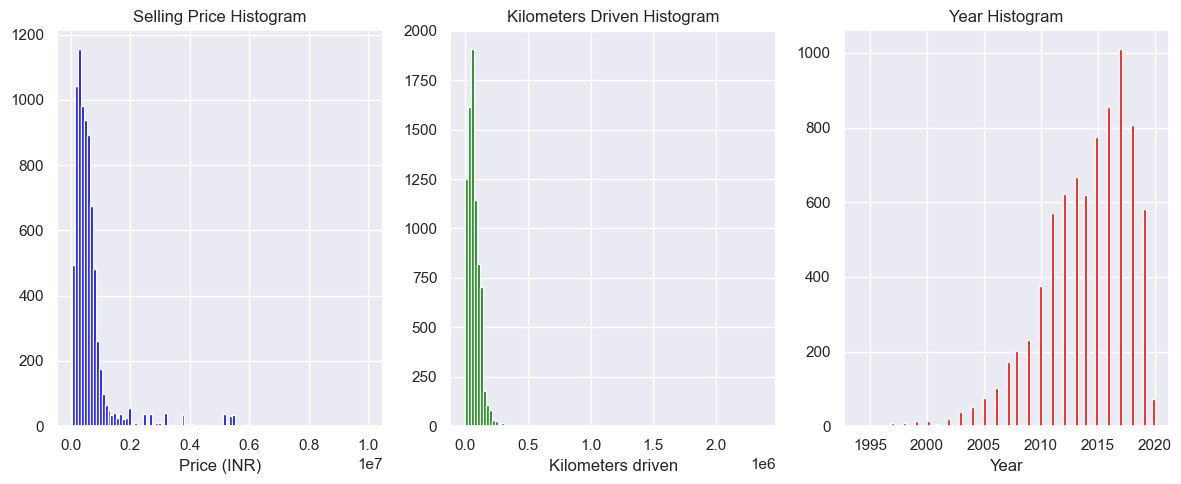

In [8]:
plt.figure(figsize=(12, 5))

# Plotting the histogram for selling_price
plt.subplot(1, 3, 1)
plt.hist(raw_data['selling_price'], bins=100, color='blue')
plt.xlabel('Price (INR)')
plt.title('Selling Price Histogram')

# Plotting the histogram for km_driven
plt.subplot(1, 3, 2)
plt.hist(raw_data['km_driven'], bins=100, color='green')
plt.xlabel('Kilometers driven')
plt.title('Kilometers Driven Histogram')


plt.subplot(1, 3, 3)
plt.hist(raw_data['year'], bins=100, color='red')
plt.xlabel('Year')
plt.title('Year Histogram')

plt.tight_layout()
plt.show()

In [9]:
# Outliers in selling_price
top_3_percent_price = raw_data['selling_price'].quantile(0.97)
print(top_3_percent_price)

2950000.0


In [10]:
# Outliers in km_driven
top_1_percent_km = raw_data['km_driven'].quantile(0.99)
print(top_1_percent_km)

225000.0


In [11]:
# Outliers in year
bottom_5_percent_year = raw_data['year'].quantile(0.05)
print(bottom_5_percent_year)

2007.0


In [12]:
# Create the boolean mask
mask = (
    (raw_data['km_driven'] < top_1_percent_km) &
    (raw_data['selling_price'] < top_3_percent_price) &
    (raw_data['year'] > bottom_5_percent_year)
)

In [13]:
data_1 = raw_data[mask]

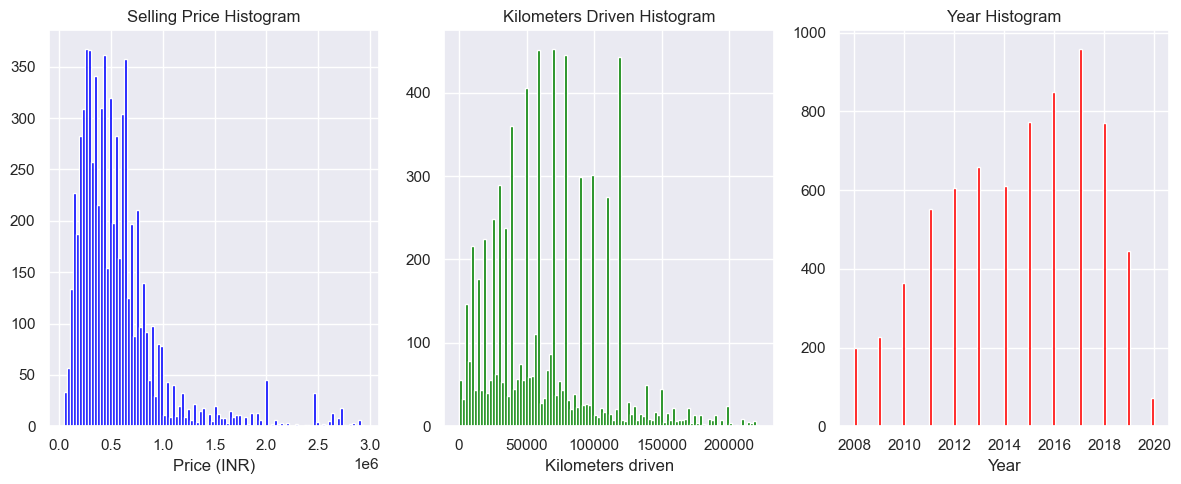

In [14]:
plt.figure(figsize=(12, 5))

# Plotting the histogram for selling_price
plt.subplot(1, 3, 1)
plt.hist(data_1['selling_price'], bins=100, color='blue')
plt.xlabel('Price (INR)')
plt.title('Selling Price Histogram')

# Plotting the histogram for km_driven
plt.subplot(1, 3, 2)
plt.hist(data_1['km_driven'], bins=100, color='green')
plt.xlabel('Kilometers driven')
plt.title('Kilometers Driven Histogram')

plt.subplot(1, 3, 3)
plt.hist(data_1['year'], bins=100, color='red')
plt.xlabel('Year')
plt.title('Year Histogram')

plt.tight_layout()
plt.show()

# Feature selection - predictive variables

### Will select a few key variables that will influence our model.
### Dependent variable: |selling_price|
### Independent variables: | name | km_driven | engine | year |

#### Omissions of note: torque and max power omitted as there might be colinearity with engine, mileage omitted as not enough information provided on the variable calculation.

In [15]:
# Drop unwanted columns
columns_to_drop = ['Sales_ID', 'Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'max_power', 'torque', 'seats', 'sold']
data_2 = data_1.drop(columns_to_drop, axis = 1).reset_index(drop=True)

In [16]:
data_2.head()

,name,year,selling_price,km_driven,engine
0,Maruti,2014,450000,145500,1248
1,Skoda,2014,370000,120000,1498
2,Hyundai,2010,225000,127000,1396
3,Hyundai,2017,440000,45000,1197
4,Toyota,2011,350000,90000,1364


### Encode categorical variables: one-hot encoding

In [17]:
data_3 = pd.get_dummies(data_2, drop_first = True)

In [18]:
data_3.head()

,year,selling_price,km_driven,engine,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Datsun,name_Fiat,...,name_Maruti,name_Mercedes,name_Mitsubishi,name_Nissan,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo
0,2014,450000,145500,1248,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,1498,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,225000,127000,1396,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,440000,45000,1197,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,350000,90000,1364,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Transform dependent variable?
### We will analyze whether or not to transform the selling_price variables. Linear regression assumes linear relationships between IV and DV.

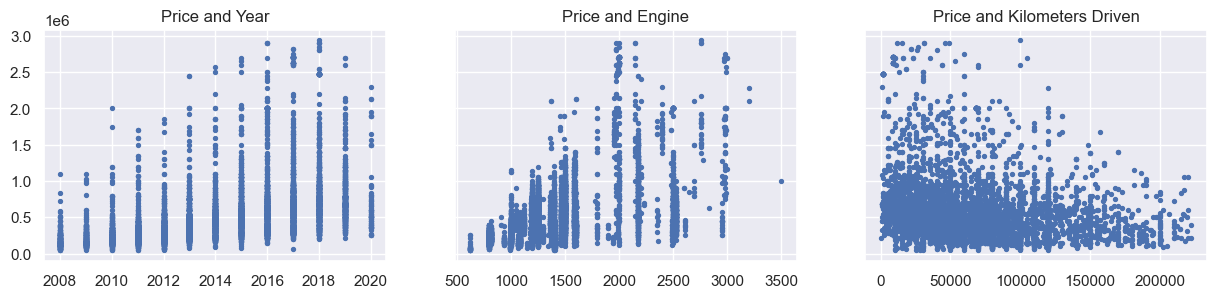

In [19]:
f, (fig1, fig2, fig3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
fig1.scatter(data_3['year'], data_3['selling_price'], s = 8)
fig1.set_title('Price and Year')
fig2.scatter(data_3['engine'], data_3['selling_price'], s = 8)
fig2.set_title('Price and Engine')
fig3.scatter(data_3['km_driven'], data_3['selling_price'], s = 8)
fig3.set_title('Price and Kilometers Driven')
plt.show()

### The relationships between the IV and DV appear slightly exponential instead of linear. We will perform a log transformation on the IV; selling_price.

In [20]:
log_price = np.log(data_3['selling_price'])
data_3['log_price'] = log_price

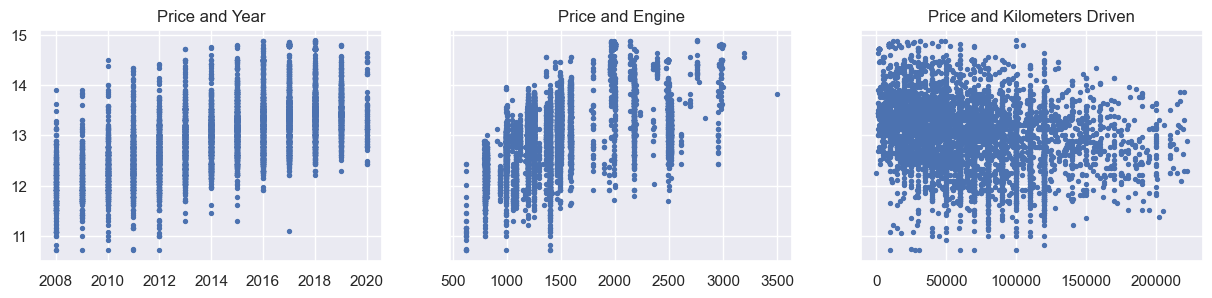

In [21]:
f, (fig1, fig2, fig3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
fig1.scatter(data_3['year'], data_3['log_price'], s = 8)
fig1.set_title('Price and Year')
fig2.scatter(data_3['engine'], data_3['log_price'], s = 8)
fig2.set_title('Price and Engine')
fig3.scatter(data_3['km_driven'], data_3['log_price'], s = 8)
fig3.set_title('Price and Kilometers Driven')
plt.show()

In [22]:
# Drop selling_price
data_4 = data_3.drop(['selling_price'], axis = 1).reset_index(drop=True)

In [23]:
data_4.head()

,year,km_driven,engine,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Datsun,name_Fiat,name_Force,...,name_Mercedes,name_Mitsubishi,name_Nissan,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo,log_price
0,2014,145500,1248,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.017003
1,2014,120000,1498,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,12.821258
2,2010,127000,1396,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.323856
3,2017,45000,1197,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.994530
4,2011,90000,1364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12.765688


In [24]:
# Rearrange columns
column_order = ['log_price'] + [col for col in data_4.columns if col != 'log_price']
data_4 = data_4[column_order]

In [25]:
data_4.describe()

,log_price,year,km_driven,engine,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Datsun,name_Fiat,...,name_Maruti,name_Mercedes,name_Mitsubishi,name_Nissan,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo
count,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,...,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000
mean,13.019159,2014.533522,65831.629922,1433.625265,0.000141,0.003952,0.004375,0.030487,0.009174,0.005787,...,0.297248,0.005081,0.001411,0.011433,0.031898,0.012844,0.093296,0.054905,0.026112,0.004517
std,0.652128,2.994284,41565.783587,474.937273,0.011880,0.062745,0.066007,0.171935,0.095349,0.075856,...,0.457079,0.071106,0.037545,0.106318,0.175742,0.112609,0.290867,0.227810,0.159478,0.067058
min,10.714418,2008.000000,1.000000,624.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.611538,2012.000000,34000.000000,1197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.060488,2015.000000,60000.000000,1248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.422468,2017.000000,90000.000000,1498.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.893920,2020.000000,222300.000000,3498.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Set DV as target

In [26]:
targets_DV = data_4['log_price']

### Set IV's as inputs and then scale

In [27]:
inputs_IV = data_4.drop(['log_price'], axis = 1)

scaler = StandardScaler()
scaler.fit(inputs_IV)

inputs_IV_scaled = scaler.transform(inputs_IV)

# Data splitting - training and testing data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(inputs_IV_scaled, targets_DV, test_size = 0.2, random_state = 365)

# Model evaluation

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_train)

In [31]:
model.score(x_train, y_train)

0.8038797701428311

In [32]:
model.score(x_test, y_test)

0.8087124189597906

### Models chosen = Linear Regression, Decision Trees, Random Forest, Gradient Boosting

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state = 365),
    'Random Forest': RandomForestRegressor(random_state = 365),
    'Gradient Boosting': GradientBoostingRegressor(random_state = 365)
}

# Iterate through the models
for model_name, model in models.items():
    
    # Train the model with the training data
    model.fit(x_train, y_train)

    # Make predictions on the testing data
    y_predicted = model.predict(x_test)

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_predicted) / y_test)) * 100

    # Calculate R2
    r2 = r2_score(y_test, y_predicted)
    
    # Print the results
    print(f'{model_name}: MAPE = {round(mape, 3)} %, R2 = {round(r2, 5)}')

Linear Regression: MAPE = 1.794 %, R2 = 0.80871
Decision Tree: MAPE = 1.38 %, R2 = 0.85426
Random Forest: MAPE = 1.207 %, R2 = 0.89715
Gradient Boosting: MAPE = 1.35 %, R2 = 0.88214


## We will proceed using the Linear Regression model. Choosing Linear Regression, despite having slightly lower accuracy, is motivated by its efficiency, simplicity, and my familiarity with its workings. Importantly, its accuracy scores still rank well within acceptable levels, making it a practical choice for the given context.

# Exploring the Linear Regression Model performance

### Testing Y testing data vs predicted Y data

In [34]:
model = LinearRegression().fit(x_train, y_train)
y_predicted = model.predict(x_test)

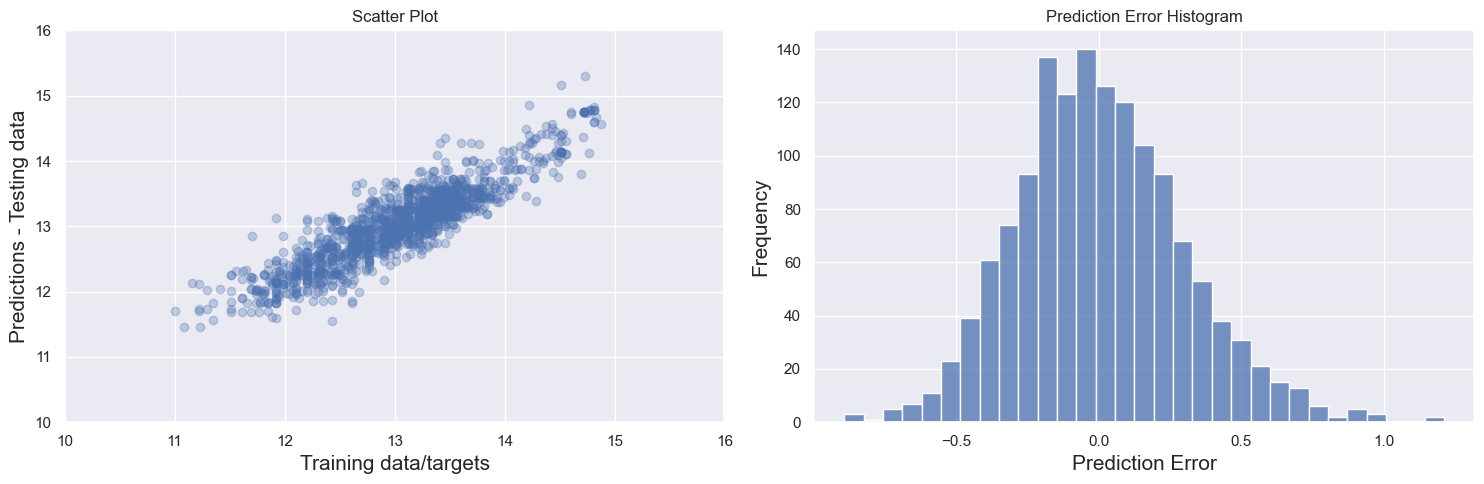

In [35]:
fig, (fig1, fig2) = plt.subplots(1, 2, figsize = (15, 5))

# Scatter for testing vs training
fig1.scatter(y_test, y_predicted, alpha = 0.3)
fig1.set_xlabel('Training data/targets', size = 15)
fig1.set_ylabel('Predictions - Testing data', size = 15)
fig1.set_xlim(10, 16)
fig1.set_ylim(10, 16)
fig1.set_title('Scatter Plot')

# Histogram for predicted Y - test Y values
sns.histplot(y_predicted - y_test, ax = fig2)
fig2.set_xlabel('Prediction Error', size = 15)
fig2.set_ylabel('Frequency', size = 15)
fig2.set_title('Prediction Error Histogram')

plt.tight_layout()
plt.show()

# Feature importance analysis

In [36]:
model_summary = pd.DataFrame(inputs_IV.columns.values, columns = ['Ind. Vars'])
model_summary['Weights'] = model.coef_
model_summary

,Ind. Vars,Weights
0,year,0.413753
1,km_driven,-0.009416
2,engine,0.378965
3,name_Ashok,0.001994
4,name_Audi,0.073115
5,name_BMW,0.084498
6,name_Chevrolet,0.009402
7,name_Datsun,-0.010974
8,name_Fiat,0.023975
9,name_Force,-0.002802


#### For the numerical variables, a value greater than 0 shows price will rise if the value rises.  
#### For the dummy variables, car brands are in relation to Lexus being the benchmark due to how dummy creation works (n-1) (Lexus removed to avoid collinearity)

# Implementation

In [37]:
def predict_price():
    
    # Get input values from the GUI  
    year = int(year_var.get())
    km_driven = int(km_entry.get())
    engine = float(engine_entry.get())
    model_name = 'name_' + model_var.get()  # Concatenate 'name_' prefix

    # Create dictionary to save car information in
    specific_car = {
        'year': year, 'km_driven': km_driven, 'engine': engine,
        'name_Ashok': 0, 'name_Audi': 0, 'name_BMW': 0,
        'name_Chevrolet': 0, 'name_Datsun': 0, 'name_Fiat': 0,
        'name_Force': 0, 'name_Ford': 0, 'name_Honda': 0,
        'name_Hyundai': 0, 'name_Isuzu': 0, 'name_Jaguar': 0,
        'name_Jeep': 0, 'name_Kia': 0, 'name_Land': 0,
        'name_MG': 0, 'name_Mahindra': 0, 'name_Maruti': 0,
        'name_Mercedes': 0, 'name_Mitsubishi': 0, 'name_Nissan': 0,
        'name_Renault': 0, 'name_Skoda': 0, 'name_Tata': 0,
        'name_Toyota': 0, 'name_Volkswagen': 0, 'name_Volvo': 0
    }

    # Set the model to 1 for the selected model from the dropdown
    specific_car[model_name] = 1

    # Convert the dictionary to a DataFrame
    specific_car_data = pd.DataFrame([specific_car])

    # Scale the input data
    specific_car_inputs_scaled = scaler.transform(specific_car_data)

    # Run the model on the scaled data
    predicted_log_price = model.predict(specific_car_inputs_scaled)

    # Convert the predicted log price back original value before log transformation
    predicted_price = np.exp(predicted_log_price)

    # Display the predicted price
    result_label.config(text=f"Predicted Price: IDR {round(predicted_price[0], 2)}")
    
#     print(f"Predicted Price: IDR {round(predicted_price[0], 2)}")
#     print(specific_car)

In [38]:
import tkinter as tk
from tkinter import ttk

window = tk.Tk()
window.title("Car Price Prediction")

# Year dropdown
year_label = tk.Label(window, text = "Select Year:")
year_label.grid(row = 0, column = 0, padx = 10, pady = 10, sticky = 'e')
years = [str(year) for year in range(2000, 2023)]
year_var = tk.StringVar()
year_dropdown = ttk.Combobox(window, textvariable = year_var, values = years)
year_dropdown.grid(row = 0, column = 1, padx = 10, pady = 10)

# Model dropdown
model_label = tk.Label(window, text = "Select Model:")
model_label.grid(row = 1, column = 0, padx = 10, pady = 10, sticky = 'e')
models = ['Ashok', 'Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
          'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG',
          'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi', 'Nissan', 'Renault',
          'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']
model_var = tk.StringVar()
model_dropdown = ttk.Combobox(window, textvariable = model_var, values = models)
model_dropdown.grid(row = 1, column = 1, padx = 10, pady = 10)

# Kilometer entry
km_label = tk.Label(window, text = "Kilometers Driven:")
km_label.grid(row = 2, column = 0, padx = 10, pady = 10, sticky = 'e')
km_entry = tk.Entry(window)
km_entry.grid(row = 2, column = 1, padx = 10, pady = 10)

# Engine entry
engine_label = tk.Label(window, text = "Engine Capacity:")
engine_label.grid(row = 3, column = 0, padx = 10, pady = 10, sticky = 'e')
engine_entry = tk.Entry(window)
engine_entry.grid(row = 3, column = 1, padx = 10, pady = 10)

# Predict button
predict_button = tk.Button(window, text = "Predict Price", command = predict_price)
predict_button.grid(row = 4, column = 0, columnspan = 2, pady = 10)

# Result label
result_label = tk.Label(window, text = "")
result_label.grid(row = 5, column = 0, columnspan = 2, pady =10)

# Start the Tkinter event loop
window.mainloop()